# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# 1.) base url -> location, everything after the base url -> 'order' configuration
# 2.) send the order
# 3.) do something with the returned object

# 1.) URL
# parts:            location        |      configuration...                  password                    specifics
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=kawalu"

# send the order
kawalu_data = requests.get(url).json()

# process the order -> City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
compact_data = {
    'City': kawalu_data['name'],
    'Cloudiness': kawalu_data['clouds']['all'],
    'Country': kawalu_data['sys']['country'],
    'Date': kawalu_data['dt'],
    'Humidity': kawalu_data['main']['humidity'],
    'Lat': kawalu_data['coord']['lat'],
    'Lng': kawalu_data['coord']['lon'],
    'Max Temp': kawalu_data['main']['temp_max'],
    'Wind Speed': kawalu_data['wind']['speed']
}

compact_data

In [10]:
# Compiled list of city weather data dictionaries
compiled_list = []

# For loop through list of city names, and create a compact dictionary for each api call result

for city in cities:
    print('Creating api call for city:', city)
    # sample: city = vaini
    
    # 1.) base url -> location, everything after the base url -> 'order' configuration
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city

    # 2.) send the order
    request_data = requests.get(url)
    
    # check to see if order is good or not 
    if request_data.status_code == 404:
        print('No data found for city:', city)
    else:
        compiled_data = request_data.json()
        # 3.) do something with the returned object
        compact_data = {
            'City': compiled_data['name'],
            'Cloudiness': compiled_data['clouds']['all'],
            'Country': compiled_data['sys']['country'],
            'Date': compiled_data['dt'],
            'Humidity': compiled_data['main']['humidity'],
            'Lat': compiled_data['coord']['lat'],
            'Lng': compiled_data['coord']['lon'],
            'Max Temp': compiled_data['main']['temp_max'],
            'Wind Speed': compiled_data['wind']['speed']
        }

        # 4.) Add data to list
        compiled_list.append(compact_data)


Creating api call for city: dhidhdhoo
Creating api call for city: albany
Creating api call for city: loudi
Creating api call for city: mataura
Creating api call for city: kangasala
Creating api call for city: kapaa
Creating api call for city: douglas
Creating api call for city: poya
Creating api call for city: taolanaro
No data found for city: taolanaro
Creating api call for city: maumere
Creating api call for city: torbay
Creating api call for city: fort morgan
Creating api call for city: touros
Creating api call for city: dikson
Creating api call for city: rikitea
Creating api call for city: la asuncion
Creating api call for city: rosario
Creating api call for city: vladaia
Creating api call for city: tazovskiy
Creating api call for city: ribeira grande
Creating api call for city: carnarvon
Creating api call for city: bethel
Creating api call for city: upernavik
Creating api call for city: kidal
Creating api call for city: merei
Creating api call for city: grand river south east
No d

Creating api call for city: gazni
No data found for city: gazni
Creating api call for city: talnakh
Creating api call for city: qostanay
Creating api call for city: muhos
Creating api call for city: zhaodong
Creating api call for city: puerto del rosario
Creating api call for city: itainopolis
No data found for city: itainopolis
Creating api call for city: saint-philippe
Creating api call for city: tuktoyaktuk
Creating api call for city: urupes
Creating api call for city: mpraeso
Creating api call for city: gazli
Creating api call for city: kaitangata
Creating api call for city: atoyac
Creating api call for city: syracuse
Creating api call for city: ayer itam
No data found for city: ayer itam
Creating api call for city: fereydun kenar
Creating api call for city: port macquarie
Creating api call for city: vostok
Creating api call for city: belushya guba
No data found for city: belushya guba
Creating api call for city: muros
Creating api call for city: devonport
Creating api call for cit

Creating api call for city: pokosnoye
Creating api call for city: cascais
Creating api call for city: aras
Creating api call for city: altea
Creating api call for city: hvammstangi
No data found for city: hvammstangi
Creating api call for city: iracoubo
Creating api call for city: narsaq
Creating api call for city: isangel
Creating api call for city: vila nova de milfontes
Creating api call for city: myitkyina
Creating api call for city: aasiaat
Creating api call for city: preobrazheniye
Creating api call for city: suntar
Creating api call for city: labuhan
Creating api call for city: maulvi bazar
No data found for city: maulvi bazar
Creating api call for city: abu dhabi
Creating api call for city: tatishchevo
Creating api call for city: inhambane
Creating api call for city: gat
Creating api call for city: puerto carreno
Creating api call for city: petrolandia
No data found for city: petrolandia
Creating api call for city: kavieng
Creating api call for city: sinnamary
Creating api call

Creating api call for city: ofunato
Creating api call for city: naushki
Creating api call for city: crab hill
No data found for city: crab hill
Creating api call for city: hirara
Creating api call for city: monrovia
Creating api call for city: renqiu
Creating api call for city: andenes
No data found for city: andenes
Creating api call for city: berlevag
Creating api call for city: srednekolymsk
Creating api call for city: magalia
Creating api call for city: svetlaya
Creating api call for city: akdepe
Creating api call for city: dingle
Creating api call for city: attawapiskat
No data found for city: attawapiskat
Creating api call for city: garowe
Creating api call for city: pietarsaari
No data found for city: pietarsaari
Creating api call for city: lively
Creating api call for city: waddan
Creating api call for city: shakawe
Creating api call for city: midyat
Creating api call for city: dawlatabad
Creating api call for city: bubaque
Creating api call for city: upington
Creating api call

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_weather_df = pd.DataFrame(compiled_list)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dhidhdhoo,100,MV,1569385051,77,6.88,73.10,81.53,21.97
1,Albany,1,US,1569384830,100,42.65,-73.75,59.00,3.36
2,Loudi,100,CN,1569385052,32,27.73,112.00,81.53,3.98
3,Mataura,100,NZ,1569385052,93,-46.19,168.86,41.00,5.01
4,Kangasala,75,FI,1569385053,93,61.46,24.07,41.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temp')

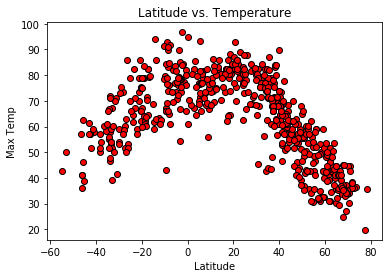

In [13]:
lat=city_weather_df['Lat']
temp=city_weather_df['Max Temp']
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

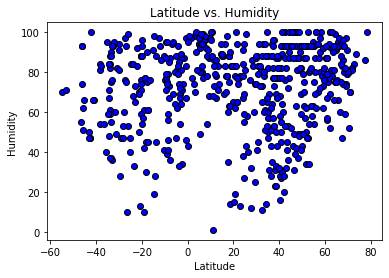

In [16]:
lat=city_weather_df['Lat']
humidity=city_weather_df['Humidity']
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

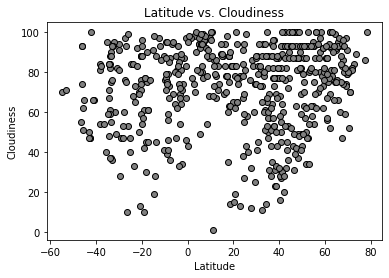

In [17]:
lat=city_weather_df['Lat']
Cloudiness=city_weather_df['Cloudiness']
plt.scatter(lat, humidity, marker="o", facecolors="gray", edgecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'wind Speed')

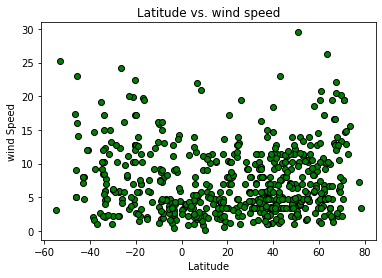

In [21]:
lat=city_weather_df['Lat']
wind_speed =city_weather_df['Wind Speed']
plt.scatter(lat, wind_speed, marker="o", facecolors="green", edgecolors="black")
plt.title("Latitude vs. wind speed")
plt.xlabel("Latitude")
plt.ylabel("wind Speed")

## Linear Regression

In [3]:
# OPTIONAL: Create a function to create Linear Regression plots


In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_lat=city_weather_df[city_weather_df['Lat']>=0]
northern_lat.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dhidhdhoo,100,MV,1569385051,77,6.88,73.10,81.53,21.97
1,Albany,1,US,1569384830,100,42.65,-73.75,59.00,3.36
2,Loudi,100,CN,1569385052,32,27.73,112.00,81.53,3.98
4,Kangasala,75,FI,1569385053,93,61.46,24.07,41.00,4.70
5,Kapaa,40,US,1569385053,74,22.08,-159.32,84.20,8.05


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

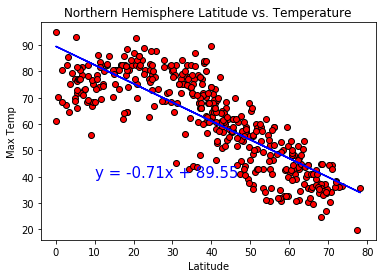

In [60]:
northern_lat=city_weather_df[city_weather_df['Lat']>=0]['Lat']
tempn=city_weather_df[city_weather_df['Lat']>=0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, tempn)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, tempn, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"b-")
plt.annotate(line_eq,(10,40),fontsize=15,color="blue")
plt.title("Northern Hemisphere Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

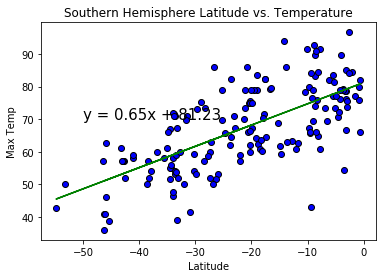

In [61]:
southern_lat=city_weather_df[city_weather_df['Lat']<=0]['Lat']
temps=city_weather_df[city_weather_df['Lat']<=0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, temps)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, temps, marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_lat,regress_values,"g-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="black")
plt.title("Southern Hemisphere Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

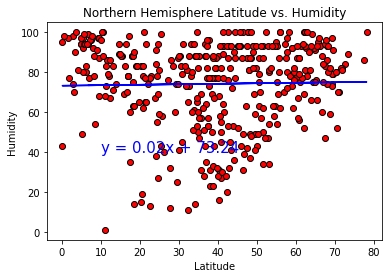

In [62]:
northern_lat=city_weather_df[city_weather_df['Lat']>=0]['Lat']
humidityn=city_weather_df[city_weather_df['Lat']>=0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, humidityn)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, humidityn, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"b-")
plt.annotate(line_eq,(10,40),fontsize=15,color="blue")
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

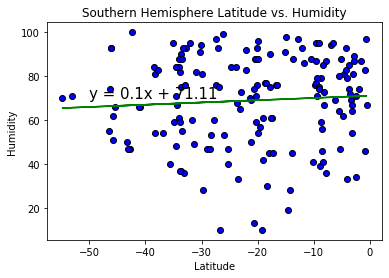

In [63]:
southern_lat=city_weather_df[city_weather_df['Lat']<=0]['Lat']
humiditys=city_weather_df[city_weather_df['Lat']<=0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, humiditys)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, humiditys, marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_lat,regress_values,"g-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="black")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

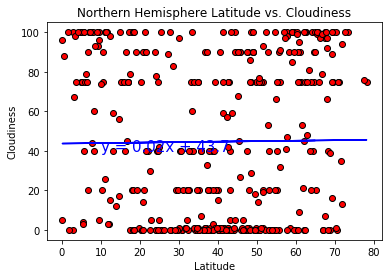

In [66]:
northern_lat=city_weather_df[city_weather_df['Lat']>=0]['Lat']
cloudn=city_weather_df[city_weather_df['Lat']>=0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, cloudn)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, cloudn, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"b-")
plt.annotate(line_eq,(10,40),fontsize=15,color="blue")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

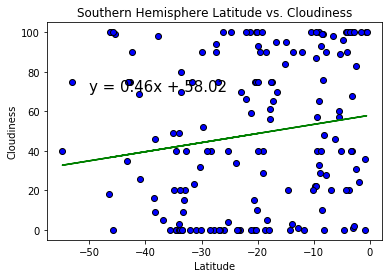

In [67]:
southern_lat=city_weather_df[city_weather_df['Lat']<=0]['Lat']
clouds=city_weather_df[city_weather_df['Lat']<=0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, clouds)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, clouds, marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_lat,regress_values,"g-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="black")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

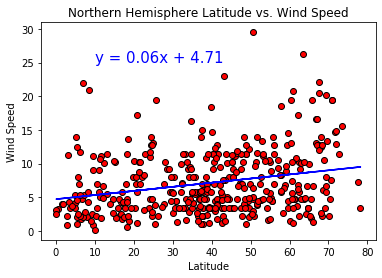

In [69]:
northern_lat=city_weather_df[city_weather_df['Lat']>=0]['Lat']
windn=city_weather_df[city_weather_df['Lat']>=0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, windn)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, windn, marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_lat,regress_values,"b-")
plt.annotate(line_eq,(10,25),fontsize=15,color="blue")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

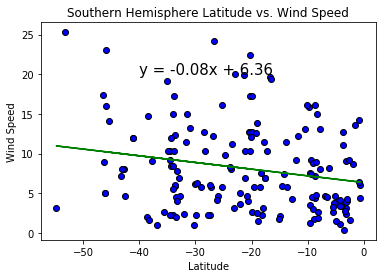

In [72]:
southern_lat=city_weather_df[city_weather_df['Lat']<=0]['Lat']
winds=city_weather_df[city_weather_df['Lat']<=0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, winds)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, winds, marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_lat,regress_values,"g-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="black")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()